In [1]:
WORKDIR = '/Users/moritzmzw/Library/CloudStorage/OneDrive-Personal/Dokumente/Stuff/Studium/Masterthesis/SERPENS'

In [2]:
import os

if WORKDIR is None:
    raise ValueError("Set the working directory as the SERPENS directory!")

if os.getcwd() != WORKDIR:
    os.chdir(WORKDIR)

print("Working Directory:", os.getcwd())

Working Directory: /Users/moritzmzw/Library/CloudStorage/OneDrive-Personal/Dokumente/Stuff/Studium/Masterthesis/SERPENS


In [3]:
from src.serpens_simulation import SerpensSimulation
from src.serpens_analyzer import SerpensAnalyzer

An exception occurred while trying to change matplotlib parameters: Failed to load Tcl_SetVar


### Setting up a Simulation

In [4]:
sim = SerpensSimulation()

Initializing new simulation instance...
	 	 ... done!


Add a planet and star. The syntax is similar to REBOUND.

In [5]:
sim.add(m=1.988e+30, r=696340000, hash="Sun")
sim.add(m=1.898e+27, a=778500000000.0, e=0.0489, inc=0.0227, r=69911000, primary="Sun", hash="Jupiter")

Currently there are no outgassing objects. Let's start the simulation anyway.

In [6]:
# Run the simulation for a short duration
sim.advance(orbits=1, verbose=False)

100%|██████████| 1/1 [00:00<00:00, 53.32it/s]

Removing 0 particles.
                .                                            .
     *   .                  .              .        .   *          .
  .         .                     .       .           .      .        .
        o                             .                   .
         .              .                  .           .
          0     .
                 .          .                 ,                ,    ,
 .          \          .                         .
      .      \   ,
   .          o     .                 .                   .            .
     .         \                 ,             .                .
               #\##\#      .                              .        .
             #  #O##\###                .                        .
   .        #*#  #\##\###                       .                     ,
        .   ##*#  #\##\##               .                     .
      .      ##*#  #o##\#         .                             ,       .
          .   

Since we do not have any outgassing object defined, the visualizer will fall back to the REBOUND orbit plotting tool.
We can pass arguments to REBOUND's orbit plot using `rebound_orbit_kwargs`.

WARNING! No SERPENS species found. Falling back to REBOUND orbit plot.


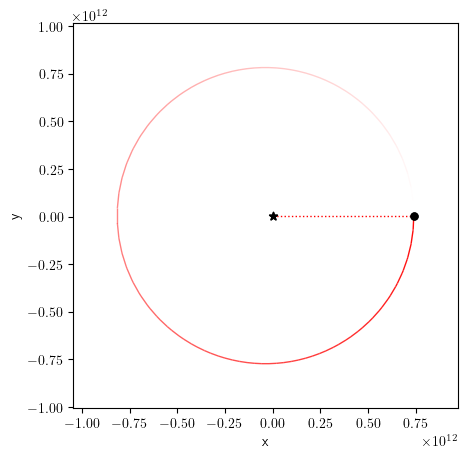

<Figure size 640x480 with 0 Axes>

In [7]:
sa = SerpensAnalyzer()
sa.plot_planar(timestep=1, rebound_orbit_kwargs={'color': True, 'periastron': True})

Similar holds for the line-of-sight plot.

WARNING! No SERPENS species found. Falling back to REBOUND orbit plot.


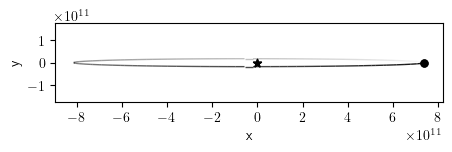

<Figure size 640x480 with 0 Axes>

In [8]:
sa.plot_lineofsight(timestep=1)

### Adding a Sourcing Object

We now add Io as a source of Sodium to the Simulation. However, in order for the code to work properly, we need to recreate the simulation.

In [9]:
from src.species import Species

In [13]:
sim = SerpensSimulation()
sim.add(m=1.988e+30, r=696340000, hash="Sun")
sim.add(m=1.898e+27, a=778500000000.0, e=0.0489, inc=0.0227, r=69911000, primary="Sun", hash="Jupiter")

sim.add(m=8.8e+22, a=421700000.0, e=0.0041, r=1821600, primary="Jupiter", hash="Io")

Initializing new simulation instance...
	 	 ... done!


In [14]:
# Declare Io as a source for Sodium
sim.object_to_source(
    "Io",
    species=Species(
        'Na',
        n_th=0, n_sp=100,
        mass_per_sec=10**4.8,
        model_smyth_v_b=0.95*1000,
        model_smyth_v_M=15.24*1000,
        lifetime=4*60,
        beta=0
    )
)

In [15]:
sim.advance(orbits=1, spawns=20, orbits_reference="Io")

 10%|█         | 2/20 [00:00<00:02,  7.82it/s]

Removing 0 particles.
Removing 0 particles.


 20%|██        | 4/20 [00:00<00:02,  6.52it/s]

Removing 0 particles.
Removing 1 particles.


 30%|███       | 6/20 [00:00<00:02,  6.10it/s]

Removing 2 particles.
Removing 3 particles.


 40%|████      | 8/20 [00:01<00:01,  6.08it/s]

Removing 6 particles.
Removing 5 particles.


 50%|█████     | 10/20 [00:01<00:01,  5.82it/s]

Removing 6 particles.
Removing 8 particles.


 55%|█████▌    | 11/20 [00:01<00:01,  5.47it/s]

Removing 12 particles.
Removing 16 particles.


 65%|██████▌   | 13/20 [00:02<00:01,  5.17it/s]

Removing 24 particles.


 70%|███████   | 14/20 [00:02<00:01,  4.92it/s]

Removing 36 particles.


 75%|███████▌  | 15/20 [00:02<00:01,  4.88it/s]

Removing 30 particles.


 80%|████████  | 16/20 [00:02<00:00,  4.41it/s]

Removing 30 particles.


 85%|████████▌ | 17/20 [00:03<00:00,  4.27it/s]

Removing 26 particles.


 90%|█████████ | 18/20 [00:03<00:00,  4.26it/s]

Removing 38 particles.


 95%|█████████▌| 19/20 [00:03<00:00,  4.27it/s]

Removing 37 particles.


100%|██████████| 20/20 [00:03<00:00,  5.06it/s]

Removing 38 particles.
                .                                            .
     *   .                  .              .        .   *          .
  .         .                     .       .           .      .        .
        o                             .                   .
         .              .                  .           .
          0     .
                 .          .                 ,                ,    ,
 .          \          .                         .
      .      \   ,
   .          o     .                 .                   .            .
     .         \                 ,             .                .
               #\##\#      .                              .        .
             #  #O##\###                .                        .
   .        #*#  #\##\###                       .                     ,
        .   ##*#  #\##\##               .                     .
      .      ##*#  #o##\#         .                             ,       .
          .  

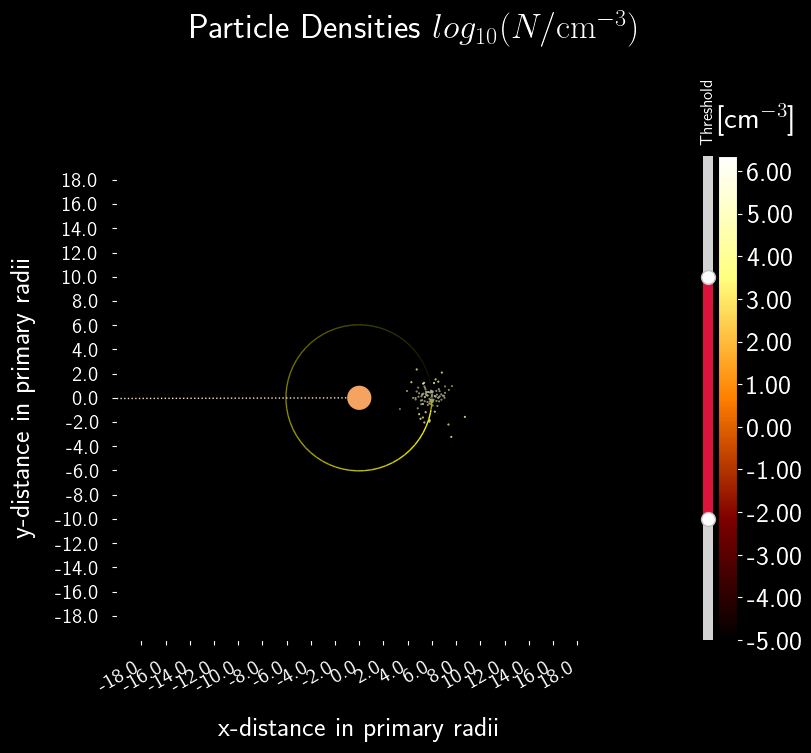

In [26]:
sa = SerpensAnalyzer()
sa.plot_planar(timestep=20, figsize=8)

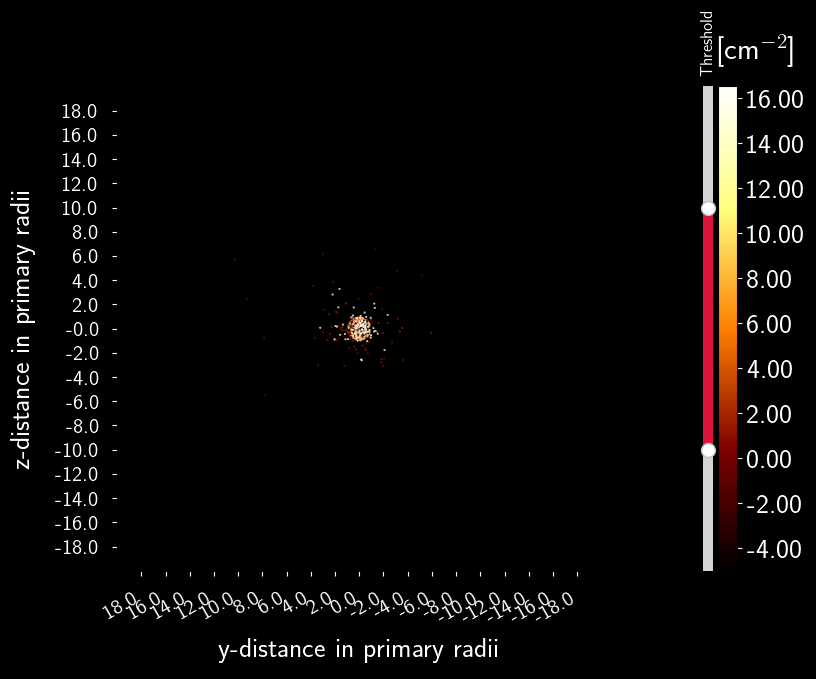

In [29]:
sa.plot_lineofsight(timestep=20, figsize=8)

### Using Pre-defined Systems

Instead of manually adding every object, we can use pre-defined systems which can be found (and edited) in 'resources/objects.json' .

In [ ]:
sim = SerpensSimulation(system="Jupiter")
# Declare Io as a source for Sodium
sim.object_to_source(
    "Io",
    species=Species(
        'Na',
        n_th=0, n_sp=100,
        mass_per_sec=10**4.8,
        model_smyth_v_b=0.95*1000,
        model_smyth_v_M=15.24*1000,
        lifetime=4*60,
        beta=0
    )
)
sim.advance(orbits=1, spawns=20, orbits_reference="Io")

With the pre-defined system, we need to declare what object we want to analyze and take as reference.

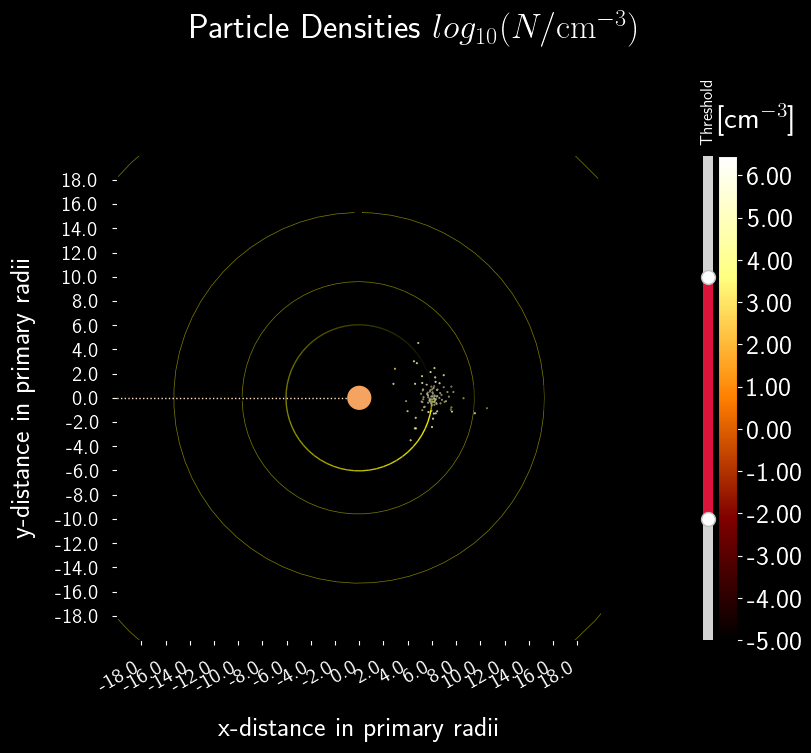

In [32]:
sa = SerpensAnalyzer(reference_system="Io")
sa.plot_planar(timestep=20, figsize=8)

### Adding Multiple Sourcing Objects

If we're interested in multiple sourcing objects, we can declare multiple objects as sources.

In [33]:
sim = SerpensSimulation(system="Jupiter")
# Declare Io as a source for Sodium
sim.object_to_source(
    "Io",
    species=Species(
        'Na',
        n_th=0, n_sp=100,
        mass_per_sec=10**4.8,
        model_smyth_v_b=0.95*1000,
        model_smyth_v_M=15.24*1000,
        lifetime=4*60,
        beta=0
    )
)
# Declare Europa as a source for Hydrogen
sim.object_to_source(
    "Europa",
    species=Species(
        'H2',
        n_th=0, n_sp=100,
        mass_per_sec=10 ** 4.8,
        model_smyth_v_b=0.95 * 1000,
        model_smyth_v_M=2.24 * 1000,
        lifetime=10 * 60,
        beta=0)
)

sim.advance(orbits=1, spawns=20, orbits_reference="Io")

Initializing new simulation instance...
	 	 ... done!


  5%|▌         | 1/20 [00:00<00:04,  4.03it/s]

Removing 0 particles.


 10%|█         | 2/20 [00:00<00:04,  3.80it/s]

Removing 0 particles.


 15%|█▌        | 3/20 [00:00<00:04,  3.72it/s]

Removing 1 particles.


 20%|██        | 4/20 [00:01<00:04,  3.68it/s]

Removing 0 particles.


 25%|██▌       | 5/20 [00:01<00:04,  3.56it/s]

Removing 4 particles.


 30%|███       | 6/20 [00:01<00:03,  3.52it/s]

Removing 11 particles.


 35%|███▌      | 7/20 [00:01<00:03,  3.44it/s]

Removing 12 particles.


 40%|████      | 8/20 [00:02<00:03,  3.36it/s]

Removing 15 particles.


 45%|████▌     | 9/20 [00:02<00:03,  3.31it/s]

Removing 24 particles.


 50%|█████     | 10/20 [00:02<00:03,  3.26it/s]

Removing 18 particles.


 55%|█████▌    | 11/20 [00:03<00:02,  3.21it/s]

Removing 31 particles.


 60%|██████    | 12/20 [00:03<00:02,  3.10it/s]

Removing 56 particles.


 65%|██████▌   | 13/20 [00:03<00:02,  2.93it/s]

Removing 56 particles.


 70%|███████   | 14/20 [00:04<00:02,  2.82it/s]

Removing 51 particles.


 75%|███████▌  | 15/20 [00:04<00:01,  2.64it/s]

Removing 54 particles.


 80%|████████  | 16/20 [00:05<00:01,  2.51it/s]

Removing 53 particles.


 85%|████████▌ | 17/20 [00:05<00:01,  2.49it/s]

Removing 63 particles.


 90%|█████████ | 18/20 [00:06<00:00,  2.46it/s]

Removing 79 particles.


 95%|█████████▌| 19/20 [00:06<00:00,  2.20it/s]

Removing 65 particles.


100%|██████████| 20/20 [00:07<00:00,  2.81it/s]

Removing 69 particles.
                .                                            .
     *   .                  .              .        .   *          .
  .         .                     .       .           .      .        .
        o                             .                   .
         .              .                  .           .
          0     .
                 .          .                 ,                ,    ,
 .          \          .                         .
      .      \   ,
   .          o     .                 .                   .            .
     .         \                 ,             .                .
               #\##\#      .                              .        .
             #  #O##\###                .                        .
   .        #*#  #\##\###                       .                     ,
        .   ##*#  #\##\##               .                     .
      .      ##*#  #o##\#         .                             ,       .
          .  

<Figure size 640x480 with 0 Axes>

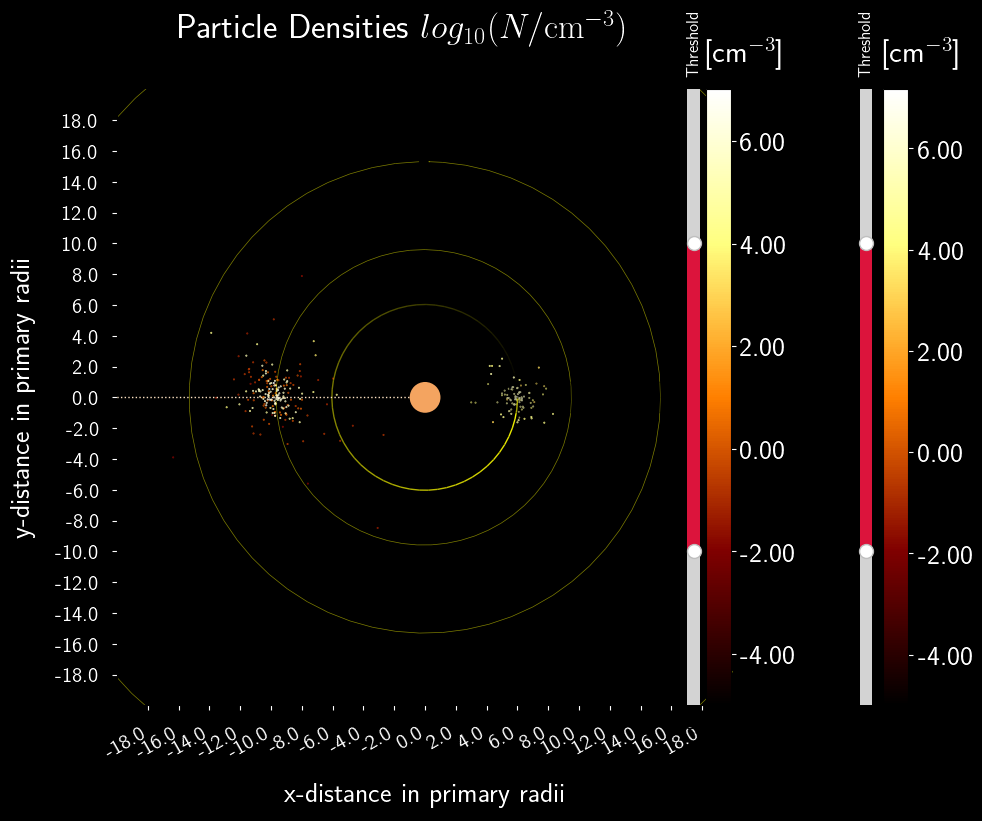

In [38]:
sa = SerpensAnalyzer(reference_system="Io")
sa.plot_planar(timestep=20, figsize=8, single_plot=True)    # Note: If an error occurs, re-executing the cell might fix the problem.

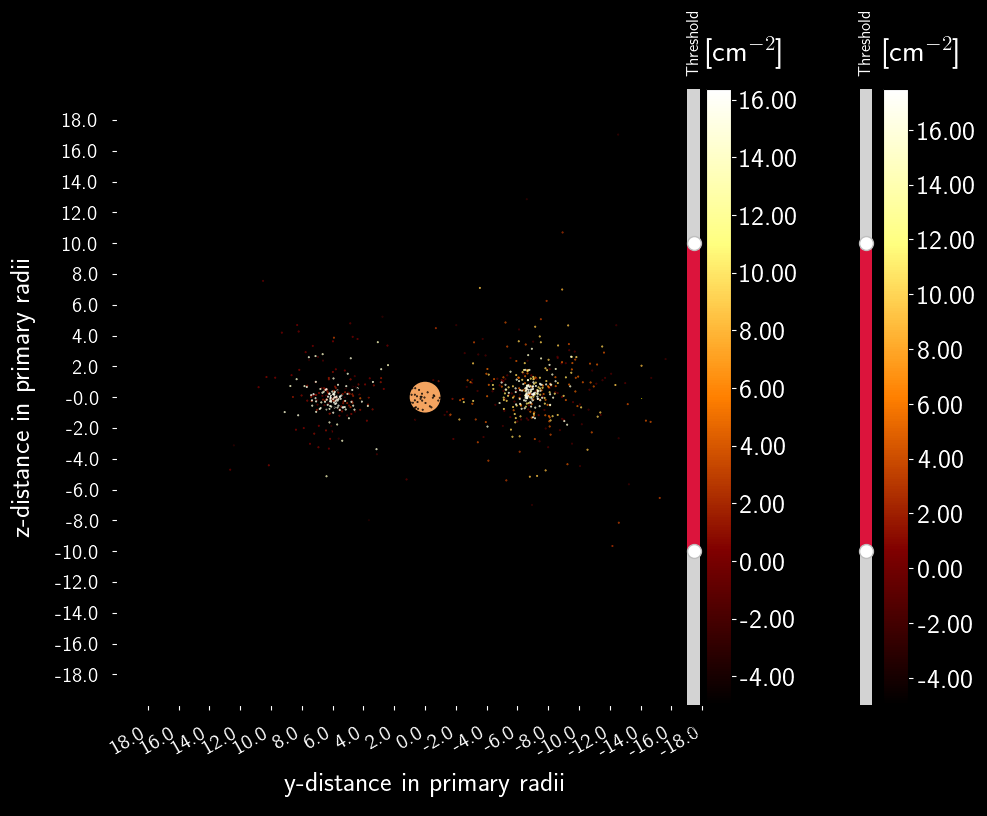

In [41]:
sa.plot_lineofsight(timestep=15, figsize=8, single_plot=True)